### Constraints and Domain-Reduction Algorithm

Sequentially reduce the values domain ($x_i$, $D_i$) of each problem variable ($x_i$), eventually converging to a solution if it exists

* **Pseudo-code Domain Reduction Algorithm**
```python
    for each dfs assignment -j- (i.e. states in a map)
        for each variable v_i considered (*)
            for each value x_i of v_i domain D_i
                for each constraint C(x_i, x_j) where x_j belongs to D_j
                    if not exist x_j such C(x_i, x_j) satisfied
                        remove x_i from D_i
                    if D_i empty
                        backtracking (DFS)
```

- Possible outcomes:
1. No solution is found and DFS empties the queue, finishes before converging to anything
2. DFS takes longer than the age of the universe (bad)
3. algorithm takes too little to get to the solution (excess of resource allocated for this task, too many colors?)

**(*) Considered???**


### Map coloring problem
Colored the regions of a map with the least amount of colors and such that NO neighbor states share the same color. In this project I'll work with a graph like implementation of a map.

In [1]:
import matplotlib.pyplot as plt

import networkx as nx 

from coloring_visualization import animate_search


%matplotlib widget

In [2]:
# Create graph and add color domain
G = nx.erdos_renyi_graph(10, 0.4, seed=12)
positions = nx.spring_layout(G, seed=1965)

colors = ["red", "green", "blue", "yellow"]

for node in G.nodes():
    G.nodes[node]["domain"] = colors.copy()

G.nodes[0]

{'domain': ['red', 'green', 'blue', 'yellow']}

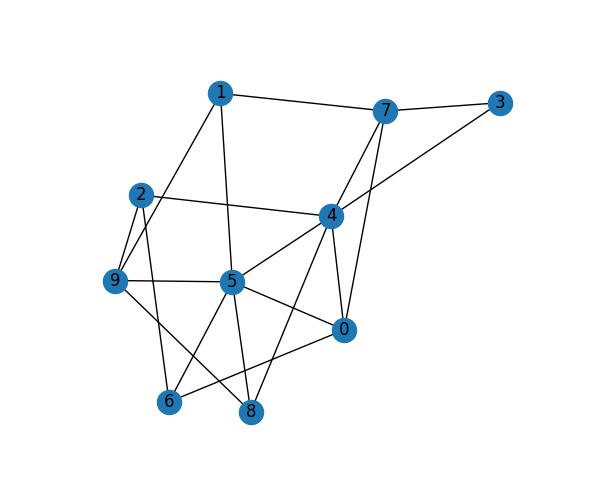

In [3]:
fig, ax = plt.subplots(figsize=(6, 5))
nx.draw_networkx(G, pos=positions, ax=ax)
ax.axis("off")
plt.show()

In [4]:
def domain_reduction(G, node, color):
    """Part of DFS coloring algo, returns False indicating dead end"""
    # considered = check neighbors
    for neighbor in G.adj[node]:
        initial_domain = G.nodes[neighbor].get("domain", []).copy() 
        for n_color in initial_domain:
            if color == n_color:
                G.nodes[neighbor]["domain"].remove(n_color)
            if not G.nodes[neighbor].get("domain", []):
                # leave the domain unchanged for future backtracking
                G.nodes[neighbor]["domain"] = initial_domain.copy()
                return False
    return True

# colors = [r, g, b, y]
# inds   = [0, 1, 2, 3]

def graph_dfs_coloring(G, colors, start = 0):
    assert start in G, f"Node {start} not in graph"

    stack = [(start, 0)]  # node, color_ind

    visited = set()
    path = []

    while stack:
        node, color_ind = stack.pop()

        if node in visited:
            continue

        if colors[color_ind] not in G.nodes[node]["domain"]:
            continue
        
        visited.add(node)
        path.append((node, colors[color_ind]))

        if domain_reduction(G, node, colors[color_ind]):
            for neighbor in sorted(G.adj[node], reverse=True):
                for i in range(1, len(colors) + 1):
                    stack.append((neighbor, (color_ind + i) % len(colors)))
        else:
            visited.remove(node)

    return path

print(*graph_dfs_coloring(G, colors), sep="\n")

(0, 'red')
(4, 'yellow')
(2, 'blue')
(6, 'green')
(5, 'blue')
(1, 'green')
(7, 'blue')
(3, 'green')
(9, 'red')
(8, 'green')


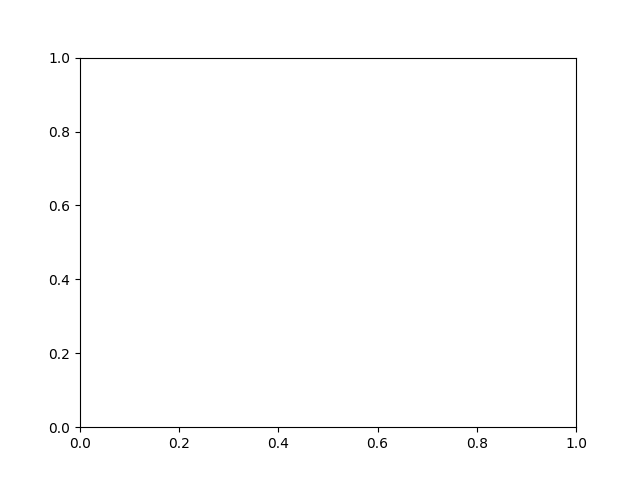

In [5]:
fig, ax = plt.subplots()
path = graph_dfs_coloring(G, colors)
explored_paths = []
for i in range(len(path)):
    explored_paths.append([t for t in path[:i+1]])


anim = animate_search(fig, ax, G, positions, "Explor 1st neighbor", explored_paths)

plt.show()



In [13]:
# Create graph and add color domain
G = nx.erdos_renyi_graph(20, 0.2, seed=12)
positions = nx.spring_layout(G, seed=1965)

colors = ["red", "green", "blue", "yellow"]

for node in G.nodes():
    G.nodes[node]["domain"] = colors.copy()

G.nodes[0]

{'domain': ['red', 'green', 'blue', 'yellow']}

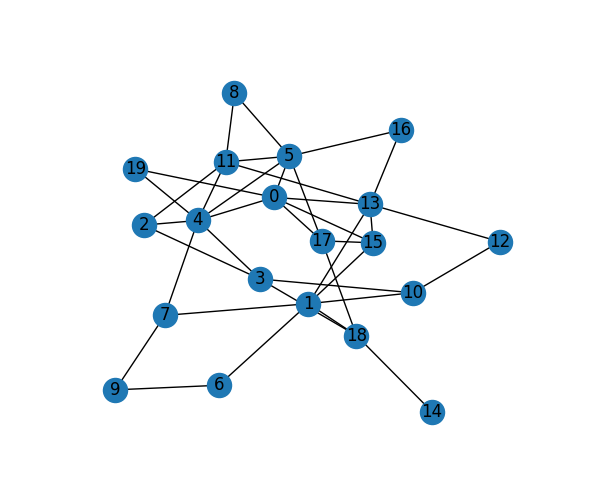

In [14]:
fig, ax = plt.subplots(figsize=(6, 5))
nx.draw_networkx(G, pos=positions, ax=ax)
ax.axis("off")
plt.show()

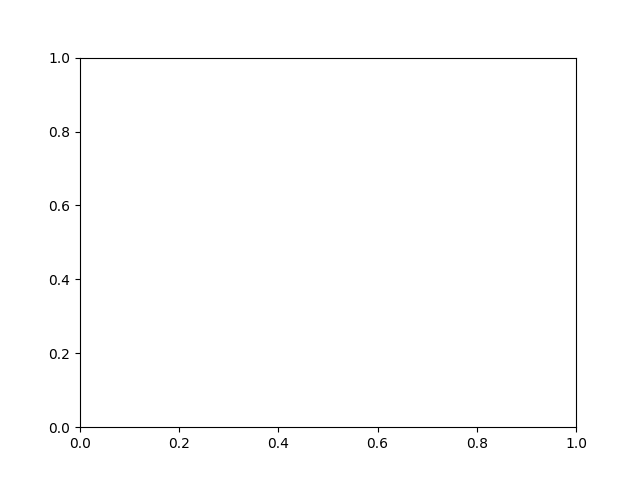

In [15]:
fig, ax = plt.subplots()
path = graph_dfs_coloring(G, colors)
explored_paths = []
for i in range(len(path)):
    explored_paths.append([t for t in path[:i+1]])


anim = animate_search(fig, ax, G, positions, "Explor 1st neighbor", explored_paths)

plt.show()

## Readme GIFs

In [16]:
import matplotlib.animation as animation

writer = animation.PillowWriter(
    fps=2,
    bitrate=1800,
)

In [17]:
anim.save(
    f"./gifs/graph_coloring_4_colors.gif",
    writer=writer,
    dpi=150
)

In [11]:
# Create graph and add color domain
G = nx.erdos_renyi_graph(20, 0.2, seed=12)
positions = nx.spring_layout(G, seed=1965)

colors = ["red", "green", "blue"]

for node in G.nodes():
    G.nodes[node]["domain"] = colors.copy()

path = graph_dfs_coloring(G, colors)
explored_paths = []
for i in range(len(path)):
    explored_paths.append([t for t in path[:i+1]])


anim = animate_search(fig, ax, G, positions, "Explor 1st neighbor", explored_paths)

anim.save(
    f"./gifs/graph_coloring_3_colors.gif",
    writer=writer,
    dpi=150
)